In [1]:
# imports
using FMI                       # for importing and simulating FMUs
using FMIFlux                   # for building neural FMUs
using FMIFlux.Flux              # the default machine learning library in Julia
using FMIZoo                    # a collection of demo FMUs
using OrdinaryDiffEq: Tsit5     # the (O)DE solver suite in Julia
using Plots                     # for plotting some results

import Random                   # for random variables (and random initialization)
Random.seed!(1234)              # makes our program deterministic

Random.TaskLocalRNG()

In [2]:
tStart = 0.0
tStep = 0.01
tStop = 5.0
tSave = collect(tStart:tStep:tStop)

501-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 ⋮
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0

In [30]:
# model with friction
# let's load the FMU in ME-mode (some FMUs support multiple simulation modes)
fmu_gt = loadFMU("SpringFrictionPendulum1D", "Dymola", "2022x"; type=:ME)  

# and print some info
info(fmu_gt)   

#################### Begin information for FMU ####################
	Model name:			SpringFrictionPendulum1D
	FMI-Version:			2.0
	GUID:				{2e178ad3-5e9b-48ec-a7b2-baa5669efc0c}
	Generation tool:		Dymola Version 2022x (64-bit), 2021-10-08
	Generation time:		2022-05-19T06:54:12Z
	Var. naming conv.:		structured
	Event indicators:		24
	Inputs:				0
	Outputs:			0
	States:				2
		33554432 ["mass.s"]
		33554433 ["mass.v", "mass.v_relfric"]
	Parameters:			12
		16777216 ["fricScale"]
		16777217 ["s0"]
		16777218 ["v0"]
		16777219 ["fixed.s0"]
		...
		16777223 ["mass.smin"]
		16777224 ["mass.v_small"]
		16777225 ["mass.L"]
		16777226 ["mass.m"]
		16777227 ["mass.fexp"]
	Supports Co-Simulation:		true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
		Var. com. steps:	true
		Input interpol.:	true
		Max order out. der.:	1
	Supports Model-Exchange:	true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize 

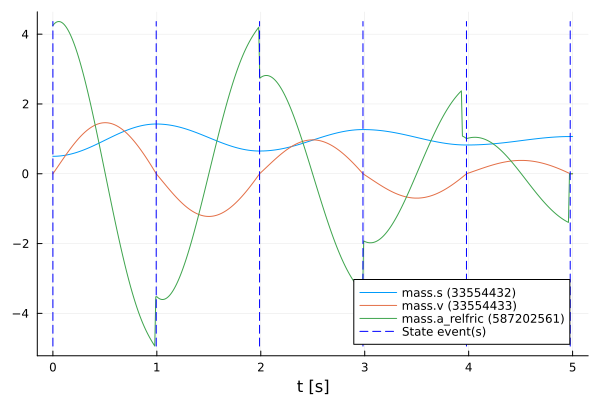

In [31]:
# the initial state we start our simulation with, position (0.5 m) and velocity (0.0 m/s) of the pendulum
x0 = [0.5, 0.0] 

# some variables we are interested in, so let's record them: position, velocity and acceleration
vrs = ["mass.s", "mass.v", "mass.a"]  

# simulate the FMU ...
sol_gt = simulate(fmu_gt, (tStart, tStop); recordValues=vrs, saveat=tSave, x0=x0)    

# ... and plot it! (but only the recorded values, not the states)
plot(sol_gt; states=false)                                                                    

In [32]:
pos_gt = getValue(sol_gt, "mass.s") # groundtruth data
vel_gt = getValue(sol_gt, "mass.v") # groundtruth data

501-element Vector{Float64}:
  0.0
  0.042689450728413444
  0.08570846016824428
  0.1289839014807958
  0.17244393614729067
  0.21601821086566914
  0.2596379058829945
  0.30323581607974015
  0.3467463867899005
  0.39010577157015425
  ⋮
  0.07850937735042217
  0.06514515756949092
  0.05160441984460443
  0.03789599578288582
  0.02402874321198262
  0.010011539311712427
 -1.0000050003147524e-10
 -1.0000050003147524e-10
 -1.0000050003147524e-10

In [33]:
unloadFMU(fmu_gt)

In [34]:
# model without friction
fmu = loadFMU("SpringPendulum1D", "Dymola", "2022x"; type=:ME)
info(fmu)

#################### Begin information for FMU ####################
	Model name:			SpringPendulum1D
	FMI-Version:			2.0
	GUID:				{fc15d8c4-758b-48e6-b00e-5bf47b8b14e5}
	Generation tool:		Dymola Version 2022x (64-bit), 2021-10-08
	Generation time:		2022-05-19T06:54:23Z
	Var. naming conv.:		structured
	Event indicators:		0
	Inputs:				0
	Outputs:			0
	States:				2
		33554432 ["mass.s"]
		33554433 ["mass.v"]
	Parameters:			7
		16777216 ["mass_s0"]
		16777217 ["mass_v0"]
		16777218 ["fixed.s0"]
		16777219 ["spring.c"]
		16777220 ["spring.s_rel0"]
		16777221 ["mass.m"]
		16777222 ["mass.L"]
	Supports Co-Simulation:		true
		Model identifier:	SpringPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
		Var. com. steps:	true
		Input interpol.:	true
		Max order out. der.:	1
	Supports Model-Exchange:	true
		Model identifier:	SpringPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
##################### End information for FMU #######

In [64]:
stringToValueReference(fmu, "mass_v0")

0x01000001

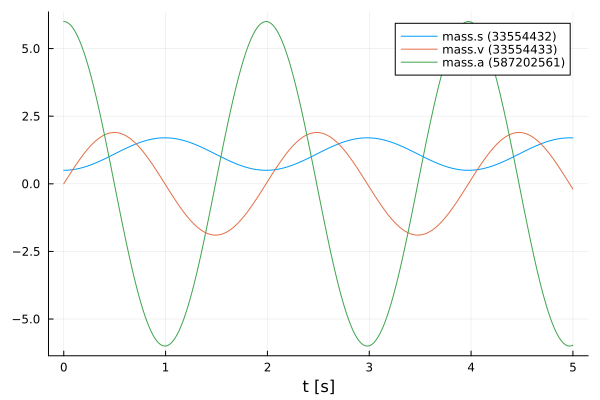

In [35]:
sol_fmu = simulate(fmu, (tStart, tStop); recordValues=vrs, saveat=tSave)
plot(sol_fmu; states=false)

In [66]:
sol_fmu.states.u

501-element Vector{Vector{Float64}}:
 [0.5, 0.0]
 [0.5002999749999916, 0.05999000049977214]
 [0.501199600022502, 0.11992001721438683]
 [0.5026979754710159, 0.17973012229992166]
 [0.5047936033874147, 0.23936051154797763]
 [0.5074843879786336, 0.29875156784002016]
 [0.5107676380971046, 0.35784389706174763]
 [0.5146400715685348, 0.41657839660715074]
 [0.5190978176616399, 0.4748963569137555]
 [0.5241364175419806, 0.5327394705723579]
 ⋮
 [1.6933022668820075, 0.2827080143010389]
 [1.695832246806606, 0.22324633563218413]
 [1.6977664462072584, 0.16356141890347717]
 [1.6991029318268105, 0.10371294351534813]
 [1.6998403636664943, 0.043760786997161315]
 [1.6999780026827032, -0.016235112126029922]
 [1.6995157121179891, -0.07621479272137174]
 [1.698453957253744, -0.13611827344810742]
 [1.6967937993279634, -0.19588564195176614]

In [67]:
getStateDerivative(sol_fmu, 1; isIndex=true)

In [ ]:
getState(sol_fmu, 1; isIndex=true)

In [36]:
manDerVars = stringToValueReference(fmu, ["mass.s","mass.v"]) # reference number of the states that we want to input into the ANN, (but i think we put their der into it)
# not sure what the correct setup is here
manDerVals = getValue(sol_gt, manDerVars)

2-element Vector{Vector{Float64}}:
 [0.5, 0.5002131418271644, 0.500854887495059, 0.5019281657516876, 0.5034351795370763, 0.50537742474533, 0.5077556973743648, 0.5105701110158936, 0.5138201163230011, 0.5175045276221266  …  1.0637521434353139, 1.0646032889175199, 1.0653217119141543, 1.0659056034549985, 1.0663532416435237, 1.0666629937790932, 1.0668333163759727, 1.0668685641881956, 1.0668685641871958, 1.0668685641861957]
 [0.0, 0.042689450728413444, 0.08570846016824428, 0.1289839014807958, 0.17244393614729067, 0.21601821086566914, 0.2596379058829945, 0.30323581607974015, 0.3467463867899005, 0.39010577157015425  …  0.0916882833380847, 0.07850937735042217, 0.06514515756949092, 0.05160441984460443, 0.03789599578288582, 0.02402874321198262, 0.010011539311712427, -1.0000050003147524e-10, -1.0000050003147524e-10, -1.0000050003147524e-10]

In [10]:
function createCacheCacheRetrieve()
    cache = CacheLayer()
    cacheRetrieve = CacheRetrieveLayer(cache) 

    return cache, cacheRetrieve
end

createCacheCacheRetrieve (generic function with 1 method)

we have an fmu with two states: [x1, x2]
so a state derivative vector with entries: [x1\dot, x2\dot]
now if stateDerivativeIndices = [1] then we only wanna do: [x1\dot, x2\dot] + [x1\dot\hat, 0]
if stateDerivativeIndices = [2] then: [x1\dot, x2\dot] + [0, x2\dot\hat]
and if stateDerivativeIndices = [1,2] then: [x1\dot, x2\dot] + [x1\dot\hat, x2\dot\hat]

In [37]:
struct ANNBlock 
    anns
    stateDerivativeIndices
    stateIndices
end

function ANNBlock(stateDerivativeIndices, stateIndices)
    # stateDerivativeIndices is a list of the indices in the state derivative vector which should get a ANN.
    # stateIndices is a list of lists of the indices in the state vector which should be inputs to the corresponding ANN.
    anns = []
    for i in 1:length(stateDerivativeIndices)
        ch = Chain(
            Dense(length(stateIndices[i]), 16, relu),
            Dense(16, 16, relu),
            Dense(16, 1),
        )
        push!(anns, ch)
    end
    ANNBlock(anns, stateDerivativeIndices, stateIndices)
end

function (m::ANNBlock)(x)
    out = zeros(eltype(x),size(x))

    j = 1
    for i in m.stateDerivativeIndices
        out[i] = m.anns[j](x[m.stateIndices[j]])[1]
        j += 1
    end
    return out
end

Flux.@functor ANNBlock

In [ ]:
size(rand(3))

In [ ]:
annblock = ANNBlock([1,3],[[1,2,3],[2]])

In [ ]:
# NEURALFMU BASELINE
# put x into the fmu and x into an ANN to get two dx vectors, add them together to get dx\hat


# get number of states
numStates = getNumberOfStates(fmu)

# pre- and post-processing
preProcess = ShiftScale(manDerVals)         # we put in the derivatives recorded above, FMIFlux shift and scales so we have a data mean of 0 and a standard deviation of 1
preProcess.scale[:] *= 0.25                         # add some additional "buffer"
postProcess = ScaleShift(preProcess)   # initialize the postProcess as inverse of the preProcess, but only take indices 2 and 3 (we don't need 1, the vehicle velocity)

cachex = CacheLayer()                        # allocate a cache layer
cachexRetrieve = CacheRetrieveLayer(cachex)   # alloca

gates = ScaleSum([1.0, 1.0, 0.0, 0.0], [[1,3], [2,4]]) # gates with sum

net2 = Chain(x -> cachex(x),
            x -> fmu(x=x, dx_refs=:all), # state vector intp fmu
            dx -> cachedx(dx),
            dx -> cachexRetrieve(1:numStates), # get state vector from cache
            preProcess,
            Dense(numStates, 32, relu),     # some additional dense layers ...
            Dense(32, 16, relu),
            Dense(16, numStates),
            postProcess,
            dx -> cachedxRetrieve(1:numStates, dx),
            gates) # dx of fmu concatenated with dx of ANN

# the neural FMU is constructed by providing the FMU, the net topology, start and stop time and a solver (here: Tsit5)
neuralFMU2 = ME_NeuralFMU(fmu, net2, (tStart, tStop), Tsit5(); saveat=tSave);

In [38]:
# NEURALFMU BASELINE
# put x into the fmu to get dx, put dx into an ANN to get dx\hat

# get number of states
numStates = getNumberOfStates(fmu)

# pre- and post-processing
preProcess = ShiftScale(manDerVals)         # we put in the derivatives recorded above, FMIFlux shift and scales so we have a data mean of 0 and a standard deviation of 1
preProcess.scale[:] *= 0.25                         # add some additional "buffer"
postProcess = ScaleShift(preProcess)   # initialize the postProcess as inverse of the preProcess, but only take indices 2 and 3 (we don't need 1, the vehicle velocity)

net1 = Chain(x -> fmu(x=x, dx_refs=:all),    # we can use the FMU just like any other neural network layer!
            preProcess,
            Dense(numStates, 32, relu),     # some additional dense layers ...
            Dense(32, 16, relu),
            Dense(16, numStates),
            postProcess)

# the neural FMU is constructed by providing the FMU, the net topology, start and stop time and a solver (here: Tsit5)
neuralFMU1 = ME_NeuralFMU(fmu, net1, (tStart, tStop), Tsit5(); saveat=tSave);

In [ ]:
sum(length, FMIFlux.params(net1))

In [39]:
# NEURALFMU BASELINE
# put x into the fmu and x into an ANN to get two dx vectors, add them together to get dx\hat


# get number of states
numStates = getNumberOfStates(fmu)

# pre- and post-processing
preProcess = ShiftScale(manDerVals)         # we put in the derivatives recorded above, FMIFlux shift and scales so we have a data mean of 0 and a standard deviation of 1
preProcess.scale[:] *= 0.25                         # add some additional "buffer"
postProcess = ScaleShift(preProcess)   # initialize the postProcess as inverse of the preProcess, but only take indices 2 and 3 (we don't need 1, the vehicle velocity)

cachex = CacheLayer()                        # allocate a cache layer
cachexRetrieve = CacheRetrieveLayer(cachex)   # alloca


cachedx = CacheLayer()                        # allocate a cache layer
cachedxRetrieve = CacheRetrieveLayer(cachedx)   # alloca

net2 = Chain(x -> cachex(x),
            x -> fmu(x=x, dx_refs=:all),    # we can use the FMU just like any other neural network layer!
            dx -> cachedx(dx),
            dx -> cachexRetrieve(1:numStates), # get state vector from cache
            preProcess,
            Dense(numStates, 32, relu),     # some additional dense layers ...
            Dense(32, 16, relu),
            Dense(16, numStates),
            postProcess,
            dx -> dx + cachedxRetrieve(1:numStates))

# the neural FMU is constructed by providing the FMU, the net topology, start and stop time and a solver (here: Tsit5)
neuralFMU2 = ME_NeuralFMU(fmu, net2, (tStart, tStop), Tsit5(); saveat=tSave);

In [ ]:
sum(length, FMIFlux.params(net2))

In [29]:
net2

Chain(
  var"#14#19"(),
  var"#15#20"(),
  var"#16#21"(),
  var"#17#22"(),
  ShiftScale{Float64}([-0.98951360431942, -0.1131440268995206], [0.5403267683307366, 0.18615317320709687]),  # 4 parameters
  Dense(2 => 32, relu),                 # 96 parameters
  Dense(32 => 16, relu),                # 528 parameters
  Dense(16 => 2),                       # 34 parameters
  ScaleShift{Float64}([1.8507319248486598, 5.3719202459551525], [0.98951360431942, 0.1131440268995206]),  # 4 parameters
  var"#18#23"(),
)                   # Total: 10 arrays, 666 parameters, 3.258 KiB.

In [40]:
# get number of states
numStates = getNumberOfStates(fmu)

# pre- and post-processing
preProcess = ShiftScale(manDerVals)         # we put in the derivatives recorded above, FMIFlux shift and scales so we have a data mean of 0 and a standard deviation of 1
preProcess.scale[:] *= 0.25                         # add some additional "buffer"
postProcess = ScaleShift(preProcess)   # initialize the postProcess as inverse of the preProcess, but only take indices 2 and 3 (we don't need 1, the vehicle velocity)

# cache
cachedx = CacheLayer()                        # allocate a cache layer
cachedxRetrieve = CacheRetrieveLayer(cachedx)   # alloca

cachex = CacheLayer()                        # allocate a cache layer
cachexRetrieve = CacheRetrieveLayer(cachex)   # alloca

# pen ode as intended in the paper
net3 = Chain(x -> cachex(x),
            x -> fmu(x=x, dx_refs=:all),    # we can use the FMU just like any other neural network layer!
            dx -> cachedx(dx),
            dx -> cachexRetrieve(1:2), # get state vector from cache
            preProcess,
            ANNBlock([1,2],[[1,2],[1,2]]), # specify which indices to alter
            postProcess,
            dx -> dx + cachedxRetrieve(1:2))

# the neural FMU is constructed by providing the FMU, the net topology, start and stop time and a solver (here: Tsit5)
neuralFMU3 = ME_NeuralFMU(fmu, net3, (tStart, tStop), Tsit5(); saveat=tSave);

In [ ]:
sum(length, FMIFlux.params(net3))

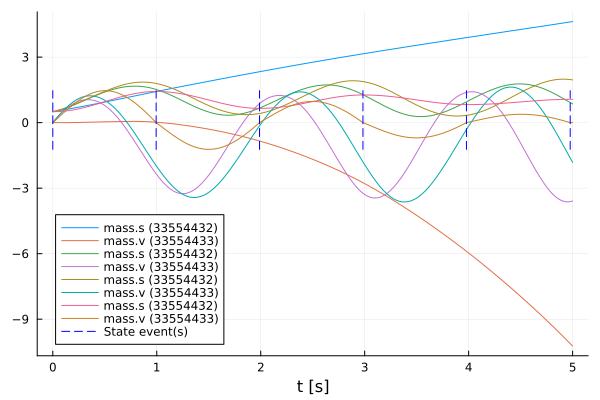

In [41]:
solutionBefore1 = neuralFMU1(x0)
solutionBefore2 = neuralFMU2(x0)
solutionBefore3 = neuralFMU3(x0)
plot(solutionBefore1)
plot!(solutionBefore2)
plot!(solutionBefore3)
plot!(sol_gt; values=false)

In [42]:
function loss(nfmu, p)
    # simulate the neural FMU by calling it
    sol_nfmu = nfmu(x0; p=p)

    # we use the first state, because we know that's the position
    pos_nfmu = getState(sol_nfmu, 1; isIndex=true)
    vel_nfmu = getState(sol_nfmu, 2; isIndex=true)

    # we could also identify the position state by its name
    #pos_nfmu = getState(solution, "mass.s")
    
    FMIFlux.Losses.mse(pos_gt, pos_nfmu) + FMIFlux.Losses.mse(vel_gt, vel_nfmu) 
end

loss (generic function with 2 methods)

In [43]:
global counter = 0
function callback(nfmu, p)
    global counter += 1
    if counter % 20 == 1
        lossVal = loss(nfmu, p[1])
        @info "Loss [$(counter)]: $(round(lossVal, digits=6))"
    end
end

callback (generic function with 2 methods)

In [44]:
function train_nfmu(nfmu, lr, iterations)
    optim = Adam(lr)

    p = FMIFlux.params(nfmu)

    FMIFlux.train!(
        p -> loss(nfmu, p), 
        nfmu,
        Iterators.repeated((), iterations), 
        optim; 
        cb=()->callback(nfmu, p)
    ) 
end

train_nfmu (generic function with 1 method)

In [50]:
train_nfmu(neuralFMU1, 1e-3, 500)
train_nfmu(neuralFMU2, 1e-3, 500)
train_nfmu(neuralFMU3, 1e-3, 500)

┌ Info: Loss [1501]: 0.701047
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1521]: 0.643692
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1541]: 0.619163
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1561]: 0.607231
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1581]: 0.597384
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1601]: 0.586178
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X35sZmlsZQ==.jl:6
┌ Info: Loss [1621]: 0.572434
└ @ Main c:\Users\DELL User\Desktop\torchdeeponet\jl_notebook_cell_df34fa98e69747e

In [51]:
solutionAfter1 = neuralFMU1(x0)
solutionAfter2 = neuralFMU2(x0)
solutionAfter3 = neuralFMU3(x0)

#fig = plot(solutionBefore; stateIndices=1:1, label="Neural FMU (before)", ylabel="position [m]")
#plot(solutionAfter1; stateIndices=1:1, label="Neural FMU1 (after)")

Model name:
	SpringPendulum1D
Success:
	true
f(x)-Evaluations:
	In-place: 201
	Out-of-place: 0
Jacobian-Evaluations:
	∂ẋ_∂p: 0
	∂ẋ_∂x: 0
	∂ẋ_∂u: 0
	∂y_∂p: 0
	∂y_∂x: 0
	∂y_∂u: 0
	∂e_∂p: 0
	∂e_∂x: 0
	∂e_∂u: 0
	∂xr_∂xl: 0
Gradient-Evaluations:
	∂ẋ_∂t: 0
	∂y_∂t: 0
	∂e_∂t: 0
Callback-Evaluations:
	Condition (event-indicators): 0
	Time-Choice (event-instances): 0
	Affect (event-handling): 0
	Save values: 0
	Steps completed: 32
States [501]:
	0.0	[0.5, 0.0]
	0.01	[0.5005479349965536, 0.04718507818670924]
	0.02	[0.5015444556654173, 0.09367658808181765]
	0.03	[0.5029843317736757, 0.13943823797120358]
	0.04	[0.5048577640210213, 0.18447424653267094]
	0.05	[0.5071633272608597, 0.22892553791268938]
	0.06	[0.5099030558971195, 0.2728877139164386]
	0.07	[0.5130750679464592, 0.31640043155441794]
	0.08	[0.5166735582149038, 0.35944912445599536]
	...
	5.0	[1.0747951251466445, 0.016101978405139404]
Events [0]:


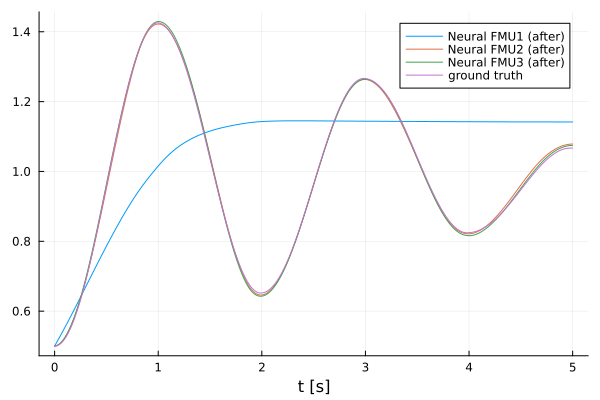

In [52]:
plot(solutionAfter1; stateIndices=1:1, label="Neural FMU1 (after)")
plot!(solutionAfter2; stateIndices=1:1, label="Neural FMU2 (after)")
plot!(solutionAfter3; stateIndices=1:1, label="Neural FMU3 (after)")
plot!(tSave, pos_gt; label="ground truth")

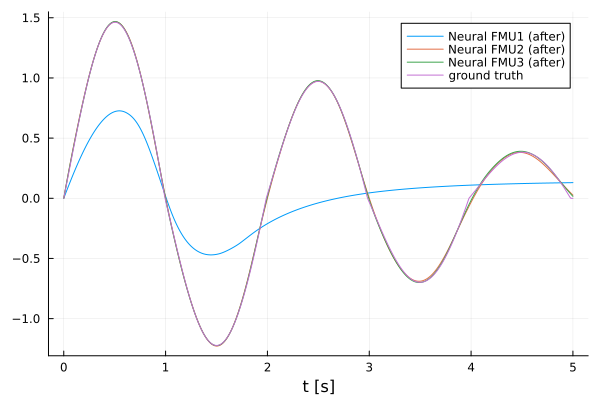

In [53]:
plot(solutionAfter1; stateIndices=2:2, label="Neural FMU1 (after)")
plot!(solutionAfter2; stateIndices=2:2, label="Neural FMU2 (after)")
plot!(solutionAfter3; stateIndices=2:2, label="Neural FMU3 (after)")
plot!(tSave, vel_gt; label="ground truth")

In [66]:
using SymbolicRegression

In [65]:
X = rand(2, 100)
y = net2[6:8](X)

2×100 Matrix{Float32}:
 -0.0460259  -0.0239499  -0.0411262  …  -0.175961  -0.0198105  -0.146109
 -0.0737413  -0.204908   -0.145934      -0.397686  -0.232847   -0.282292

In [98]:
function f1(x)
    ((x[2] * 0.0438001215526404) * exp(cos(cos(cos(x[1]) + x[2])) - (x[1] / x[2]))) + (x[1] * -0.2236845873023353)
end

function f2(x)
    ((((x[2] - (x[1] * 0.66684415393459)) - 0.3989534181961338) * (x[1] - (x[2] * x[1]))) - (x[2] * 0.3625586995345729)) / 1.4501979387951138
end

f2 (generic function with 1 method)

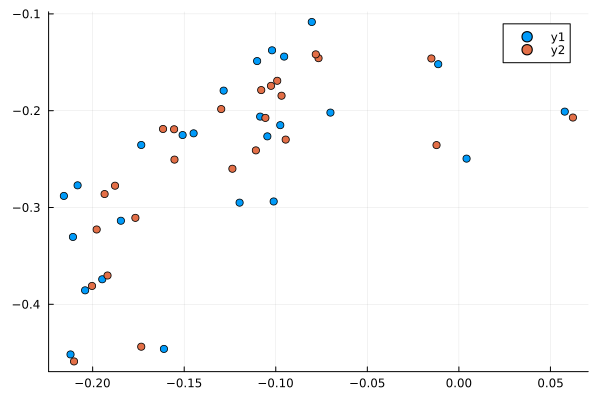

In [99]:
X_t = rand(2, 25)
net_y = net2[6:8](X_t)
scatter(net_y[1,:], net_y[2,:])
scatter!(f1.(eachcol(X_t)), f2.(eachcol(X_t)))

In [67]:
options = Options(
    binary_operators=[+, *, /, -],
    unary_operators=[cos, exp],
    populations=20
)

hall_of_fame = equation_search(
    X, y, niterations=40, options=options,
    parallelism=:multithreading
)

┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression C:\Users\DELL User\.julia\packages\SymbolicRegression\9q4ZC\src\Configure.jl:55
┌ Info: Started!
└ @ SymbolicRegression C:\Users\DELL User\.julia\packages\SymbolicRegression\9q4ZC\src\SymbolicRegression.jl:840



Expressions evaluated per second: 6.550e+04
Head worker occupation: 7.6%
Progress: 198 / 1600 total iterations (12.375%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.828e-03  3.604e+01  y₁ = -0.083549
3           1.316e-03  8.231e-01  y₁ = x₁ * -0.18962
5           6.526e-04  3.509e-01  y₁ = (x₁ * -0.26452) + 0.051119
7           1.363e-04  7.830e-01  y₁ = (x₁ * -0.25791) + (x₂ * 0.088006)
9           1.169e-04  7.668e-02  y₁ = ((x₁ * -0.26726) - -0.011533) + (x₂ * 0.078283)
11          9.442e-05  1.070e-01  y₁ = ((x₁ * -0.26694) + ((x₂ * 0.076956) * x₂)) + 0.024527
12          9.204e-05  2.554e-02  y₁ = (x₁ * -0.23432) + ((x₂ * 0.11172) * exp(-0.028727 - x₁))
14          9.050e-05  8.437e-03  y₁ = (x₁ * -0.23432) + (exp((x₁ - x₁) - x₁) * (x₂ * 0.11172))
18          8.075e-05  2.850e-02  y₁ = (x₁ * -0.23342) + ((x₂ * 0.13105) * exp((0

2-element Vector{HallOfFame{Float64, Float64, Node{Float64}}}:
 HallOfFame{Float64, Float64, Node{Float64}}(PopMember{Float64, Float64, Node{Float64}}[PopMember{Float64, Float64, Node{Float64}}(-0.08354917293001334, 0.6860448396760455, 0.006828448397568843, 17274475031270000, 1, 5902877328996546067, 5305653681772579664), PopMember{Float64, Float64, Node{Float64}}(cos(-1.520802225621216), 2.472069324889621, 0.024656693250512986, 17274475201340000, 2, 2161147475391820243, 6009860657282512760), PopMember{Float64, Float64, Node{Float64}}(x1 * -0.18961882083485232, 0.14124030786676595, 0.0013164030834211299, 17274475041070002, 3, 3940057876807173249, 6949379738861886216), PopMember{Float64, Float64, Node{Float64}}(exp(x1) * -0.05631768169727261, 0.3526709881168543, 0.003398709884402095, 17274475256370000, 4, 8728777532747817602, 4607932967089728320), PopMember{Float64, Float64, Node{Float64}}((x1 * -0.26452149186700685) + 0.0511188088863842, 0.08125827318416852, 0.0006525827428685445, 17274

In [91]:
using SymbolicUtils

ArgumentError: ArgumentError: Package SymbolicUtils not found in current path.
- Run `import Pkg; Pkg.add("SymbolicUtils")` to install the SymbolicUtils package.

((x2 * 0.0438001215526404) * exp(cos(cos(cos(x1) + x2)) - (x1 / x2))) + (x1 * -0.2236845873023353)

In [97]:
dom = calculate_pareto_frontier(hall_of_fame[1])
dom[end].tree

((x2 * 0.0438001215526404) * exp(cos(cos(cos(x1) + x2)) - (x1 / x2))) + (x1 * -0.2236845873023353)